# MAR 653 - Final Project

Cartney Thompson <br />
MAR 653 <br />
Fall 2018 <br />

In [211]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Using seaborn for visualization
plt.rcParams['figure.figsize'] = [18, 6]

## Import Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values = ' ')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Clean-up

Check for null values

In [4]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values in total charges. Those are for new customers who have not received their bill yet. We will impute 0 for those NAs.

In [5]:
df['TotalCharges'].fillna(0, inplace=True)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Total Charges should be a numeric.

In [7]:
#Change total charges to numeric
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric)

In [8]:
#Change No internet service adn No phone service to No for all columns
df = df.replace('No internet service','No')
df = df.replace('No phone service','No')

## Data Exploration

### Customers and Demographics

#### Number of Customers

In [9]:
# Number of customers
customerCount = df['customerID'].nunique()
print('Total number of customers: {:d}'.format(customerCount))

Total number of customers: 7043


#### Count of Customers 

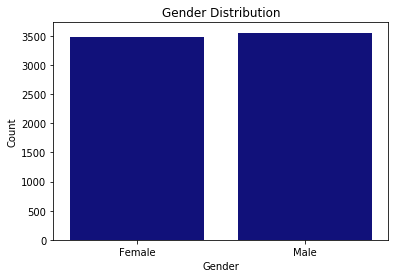

In [10]:
#A simple histogram of the count of games by attendance

sns.countplot(x='gender', data=df, color='darkblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

#### Churners

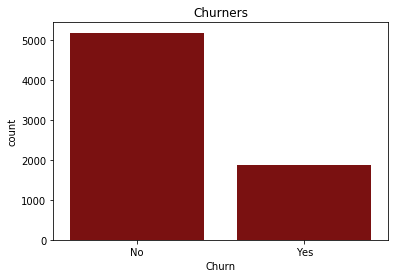

In [11]:
#Churn Distribution
sns.countplot(x='Churn', data=df, color ='darkred')
plt.title('Churners')
plt.show()

### Demographics

#### Gender

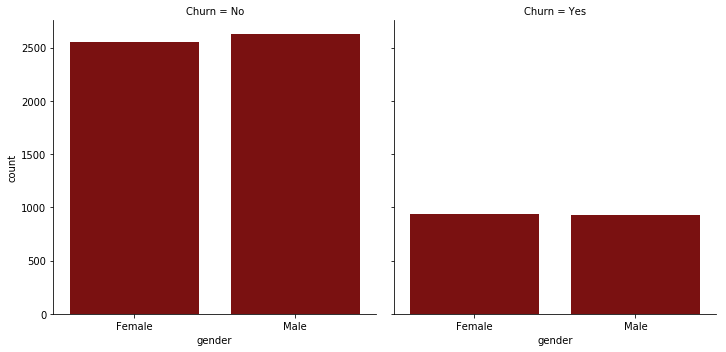

In [12]:
import seaborn as sns
g = sns.catplot(x='gender', col='Churn', data=df, kind='count', color='darkred')

#### Senior Citizen

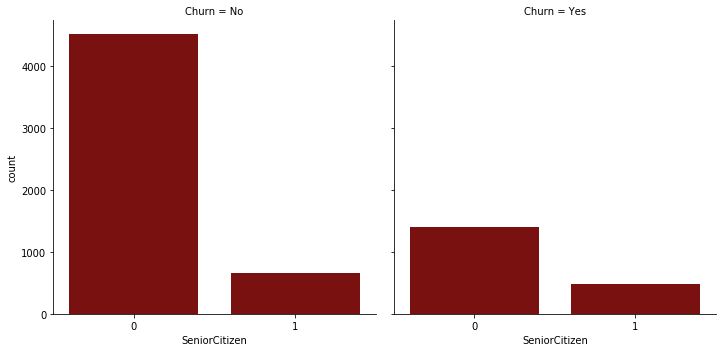

In [13]:
g = sns.catplot(x='SeniorCitizen', col='Churn',
                data=df, kind="count", color='darkred')

#### Dependents

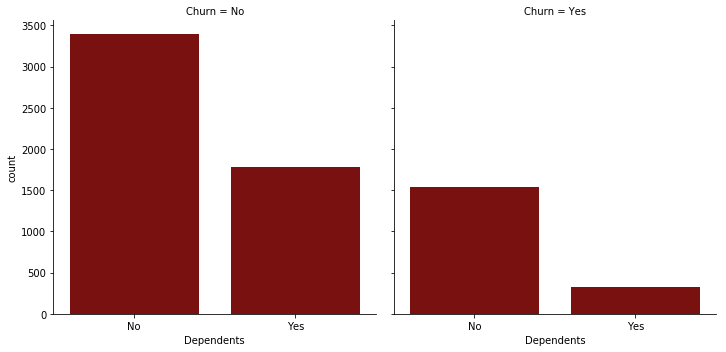

In [14]:
g = sns.catplot(x='Dependents', col='Churn',
                data=df, kind="count", color='darkred')

### Tenure

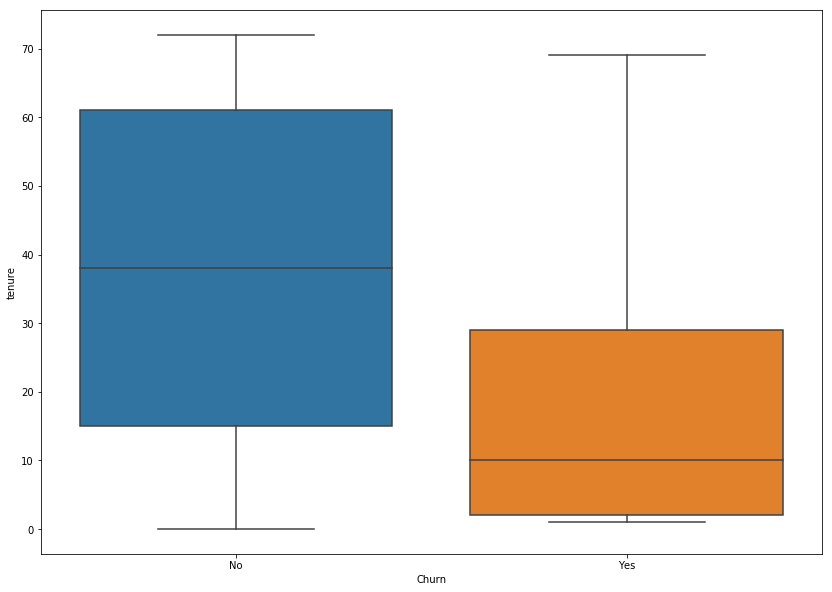

In [15]:
fig=plt.figure(figsize=(14, 10))
sns.boxplot(x='Churn', y='tenure', data=df,showfliers=False)
plt.show()

### Products

#### Phone Service

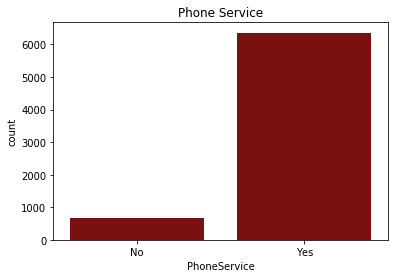

In [16]:
#Phone Service Distribution
sns.countplot(x='PhoneService', data=df, color ='darkred')
plt.title('Phone Service')
plt.show()

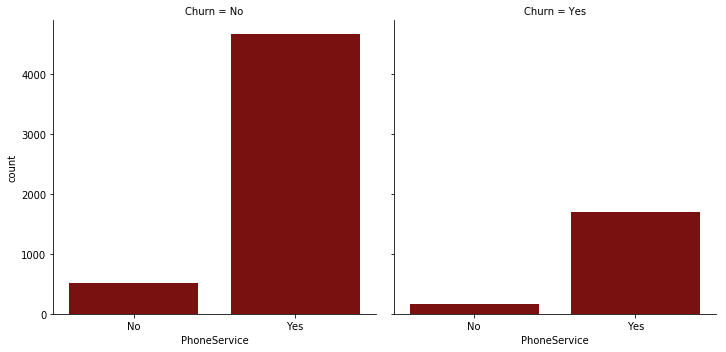

In [17]:
g = sns.catplot(x='PhoneService', col='Churn',
                data=df, kind="count", color='darkred')

#### Internet Service

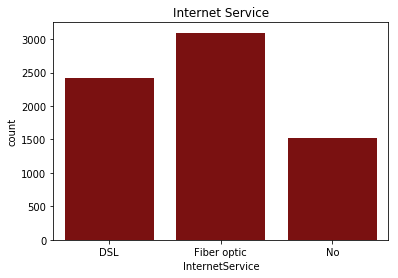

In [18]:
sns.countplot(x='InternetService', data=df, color ='darkred')
plt.title('Internet Service')
plt.show()

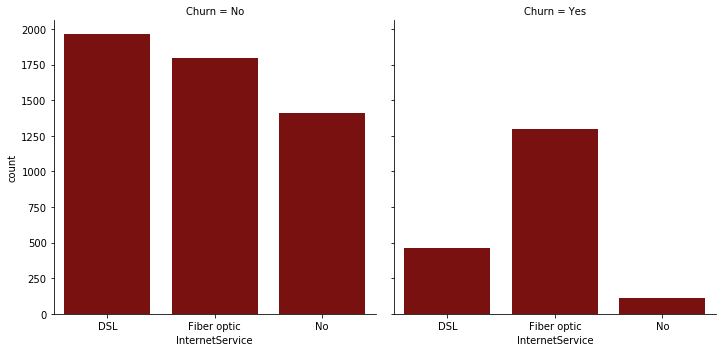

In [19]:
g = sns.catplot(x='InternetService', col='Churn',
                data=df, kind="count", color='darkred')

#### Online Security Service

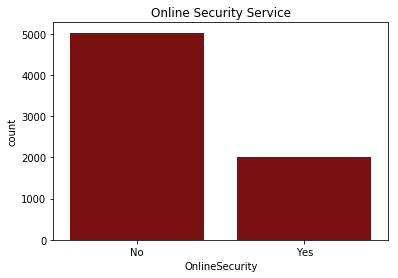

In [20]:
sns.countplot(x='OnlineSecurity', data=df, color ='darkred')
plt.title('Online Security Service')
plt.show()

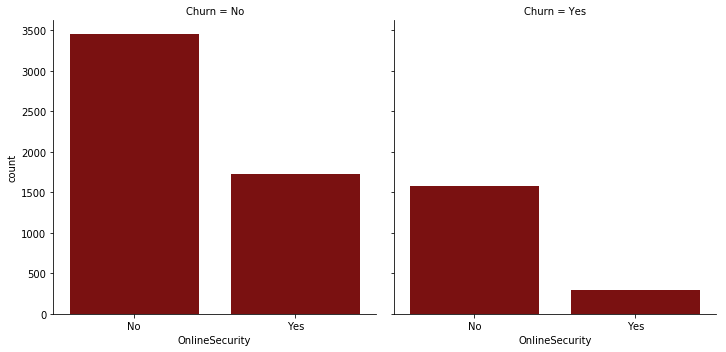

In [21]:
g = sns.catplot(x='OnlineSecurity', col='Churn',
                data=df, kind="count", color='darkred')

#### Online Backup Service

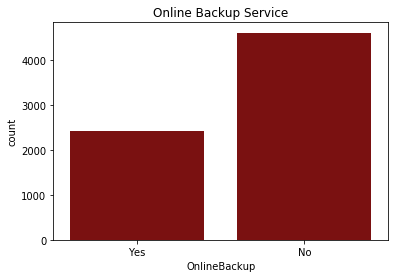

In [22]:
sns.countplot(x='OnlineBackup', data=df, color ='darkred')
plt.title('Online Backup Service')
plt.show()

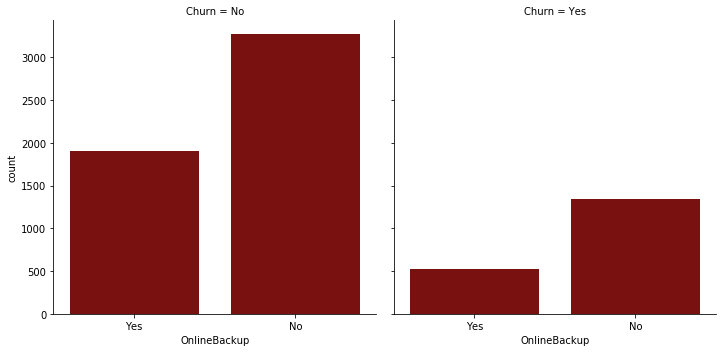

In [23]:
g = sns.catplot(x='OnlineBackup', col='Churn',
                data=df, kind="count", color='darkred')

#### Device Protection

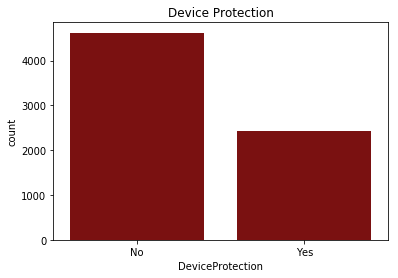

In [24]:
sns.countplot(x='DeviceProtection', data=df, color ='darkred')
plt.title('Device Protection')
plt.show()

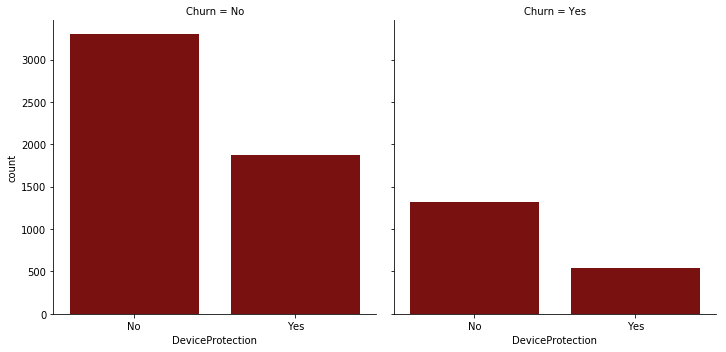

In [25]:
g = sns.catplot(x='DeviceProtection', col='Churn',
                data=df, kind="count", color='darkred')

#### Tech Support

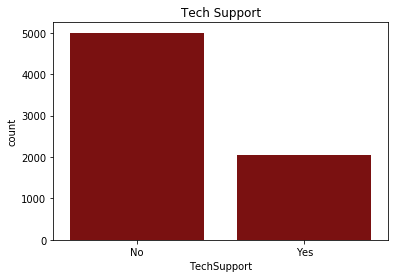

In [26]:
sns.countplot(x='TechSupport', data=df, color ='darkred')
plt.title('Tech Support')
plt.show()

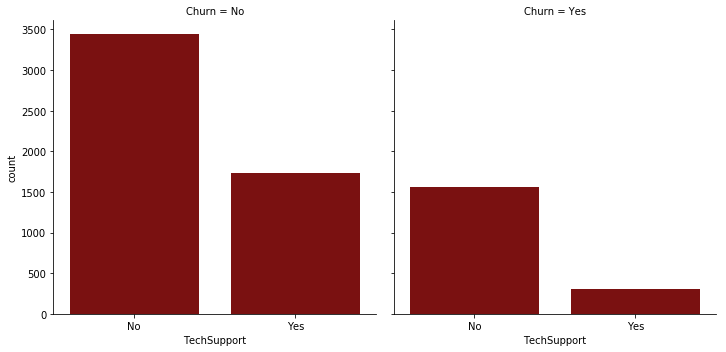

In [27]:
g = sns.catplot(x='TechSupport', col='Churn',
                data=df, kind="count", color='darkred')

#### Streaming TV Services

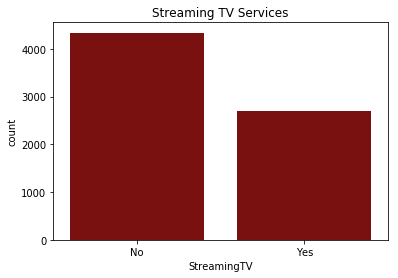

In [28]:
sns.countplot(x='StreamingTV', data=df, color ='darkred')
plt.title('Streaming TV Services')
plt.show()

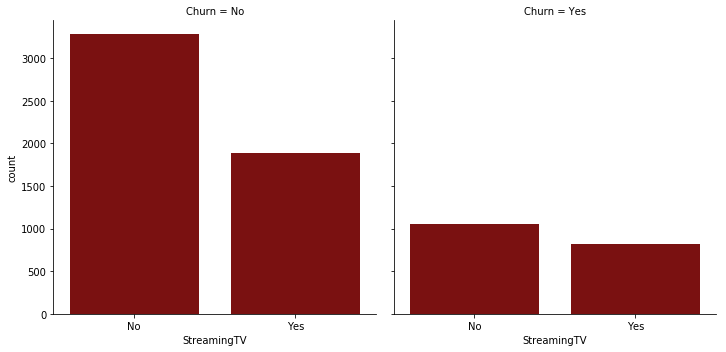

In [29]:
g = sns.catplot(x='StreamingTV', col='Churn',
                data=df, kind="count", color='darkred')

#### Streaming Movies

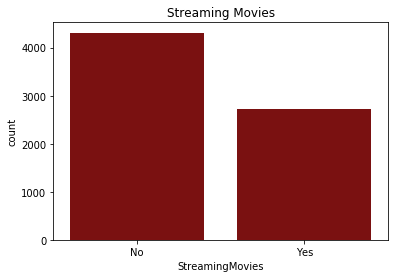

In [30]:
sns.countplot(x='StreamingMovies', data=df, color ='darkred')
plt.title('Streaming Movies')
plt.show()

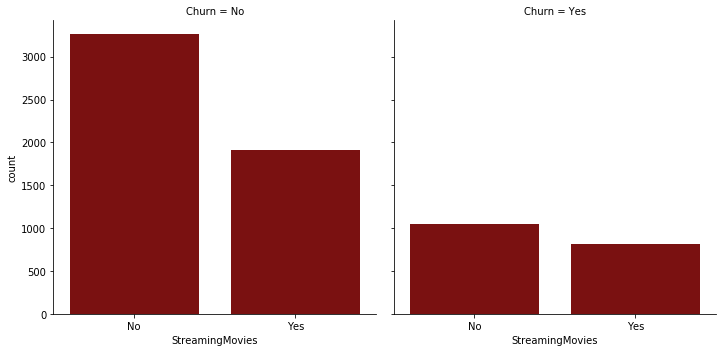

In [31]:
g = sns.catplot(x='StreamingMovies', col='Churn',
                data=df, kind="count", color='darkred')

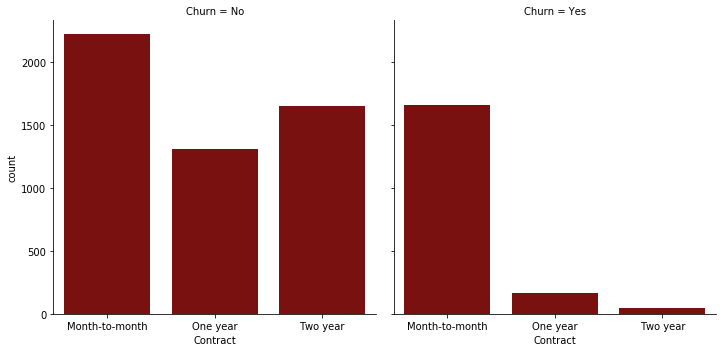

In [32]:
g = sns.catplot(x='Contract', col='Churn',
                data=df, kind="count", color='darkred')

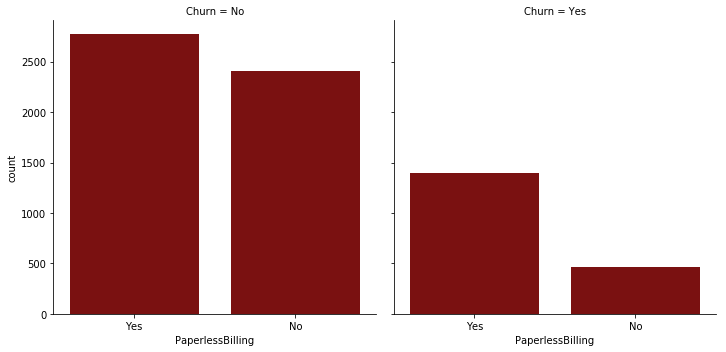

In [33]:
g = sns.catplot(x='PaperlessBilling', col='Churn',
                data=df, kind="count", color='darkred')

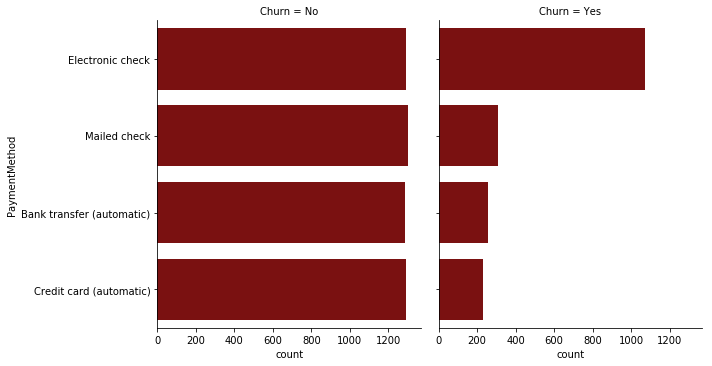

In [34]:
g = sns.catplot(y='PaymentMethod', col='Churn',data=df, kind="count", color='darkred')

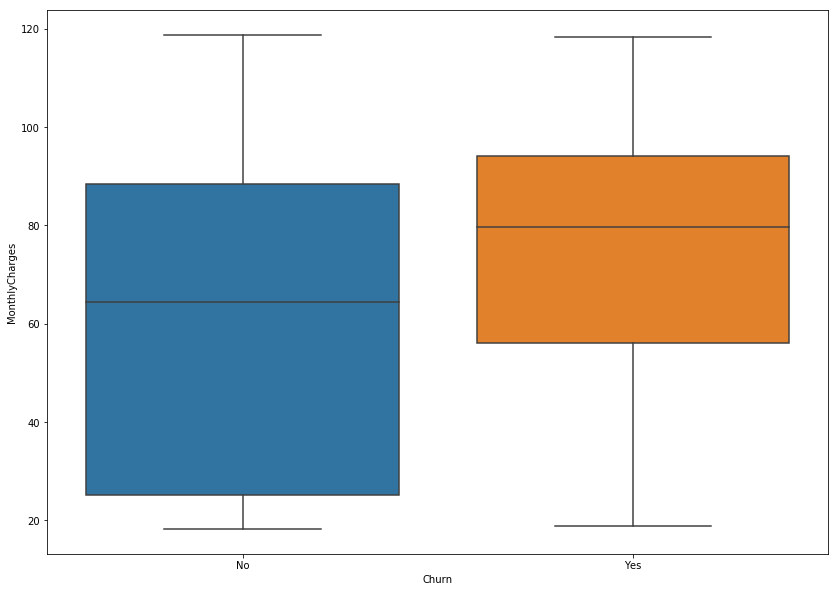

In [35]:
fig=plt.figure(figsize=(14, 10))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df,showfliers=False)
plt.show()

## Model Building

For our first model, we are going to build utilizing logistic regression to predict churn. First, let's have a look at our data.

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A couple of observations: 
- Partner, Dependents, MultipleLines, Phone Service, Online Security, Online Backup, Device Protection, Tech Support, StreamingTV, StreamingMovies, PaperlessBilling, and Churn all need to be recoded as binary.
- Gender, InternetService, Contract, and PaymentMethod need to be one-hot encoded.

### Binary Encoding

In [37]:
#Get columns that we will change to categorical
cat_columns = ['Partner', 'MultipleLines', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

#Convert columns to category
df[cat_columns] = df[cat_columns].astype('category')

#Convert t0 binary values
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [38]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,0,0,8,1,1,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,0,1,22,1,1,Fiber optic,0,...,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,0,0,10,0,0,DSL,1,...,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,1,0,28,1,1,Fiber optic,0,...,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,0,1,62,1,0,DSL,1,...,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


### One-Hot Encoding

In [39]:
#Get columns that we will one-hot encode
cat_columns = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

#One-hot encode columns from above
model = pd.get_dummies(df, prefix_sep="_", columns=cat_columns)

#Drop customerID columns
model = model.drop(['customerID'], axis=1)

Next, let's look at redundant variables.

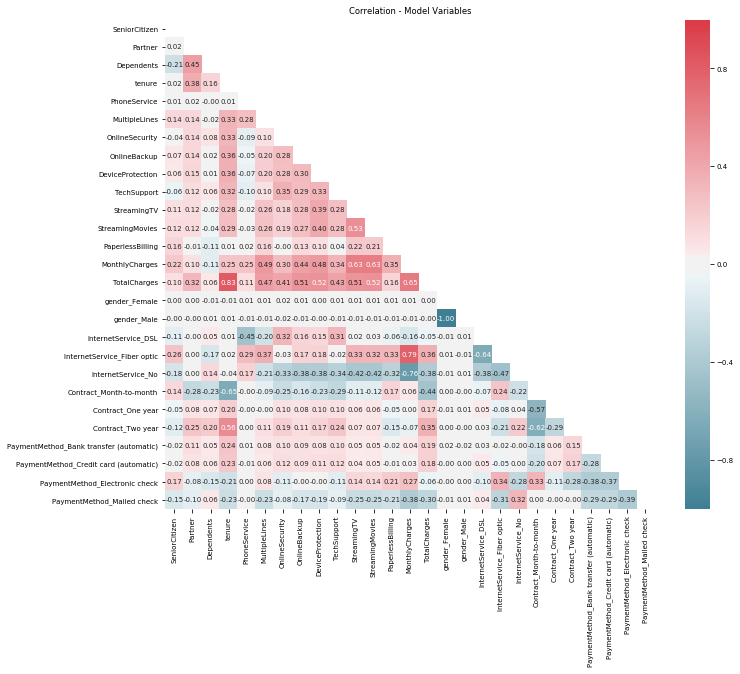

In [40]:
#Let's build a correlation plot to see which variables we can remove
#Compute the correlation matrix
import matplotlib as mpl

mpl.rcParams["font.size"] = 7
features = model.drop(['Churn'], axis=1)
corr = features.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", square=True)
plt.title('Correlation - Model Variables')
plt.show()

Looking at this correlation plot, some variables are highly correlated with other variables. We will remove the following variables:
- TotalCharges (highly correlated with tenure, OnlineBackup, DeviceProtection, StreamingTV, MonthlyCharges, and Contract_Two year)
- MonthlyCharges (highly correlated with InternetService_Fiber optic, StreamingTV, and StreamingMovies)
- StreamingMovies (highly correlted with StreamingTV)

Next, we wil go ahead and build our model

### Test/Training Data Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
y=model[['Churn']]
X=model.drop(['Churn', 'gender_Male', 'InternetService_No', 'Contract_Month-to-month', 'PaymentMethod_Mailed check', 'TotalCharges', 'MonthlyCharges', 'StreamingMovies'], axis=1)

In [43]:
#Create Training/Test split of 66/33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
print (X_train.shape, y_train.shape)

(4930, 20) (4930, 1)


In [45]:
print (X_test.shape, y_test.shape)

(2113, 20) (2113, 1)


### Model 1

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [47]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.423580
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4910
Method:                           MLE   Df Model:                           19
Date:                Sun, 09 Dec 2018   Pseudo R-squ.:                  0.2644
Time:                        18:01:05   Log-Likelihood:                -2088.2
converged:                       True   LL-Null:                       -2838.9
                                        LLR p-value:                2.357e-307
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
SeniorCitizen                               0.1890

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Cartney\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
y1_pred=logreg.predict(X_test)
y1_pred_train=logreg.predict(X_train)

In [50]:
# Print Train results
print("Number of mislabeled points out of a total {} points : {}, Accuracy {:05.2f}%"
      .format(
          X_train.shape[0],
          (y_train['Churn']!= y1_pred_train).sum(),
          100*(1-(y_train['Churn'] != y1_pred_train).sum()/X_train.shape[0])
))

Number of mislabeled points out of a total 4930 points : 972, Accuracy 80.28%


In [51]:
# Print Test results
print("Number of mislabeled points out of a total {} points : {}, Accuracy {:05.2f}%"
      .format(
          X_test.shape[0],
          (y_test['Churn']!= y1_pred).sum(),
          100*(1-(y_test['Churn'] != y1_pred).sum()/X_test.shape[0])
))

Number of mislabeled points out of a total 2113 points : 405, Accuracy 80.83%


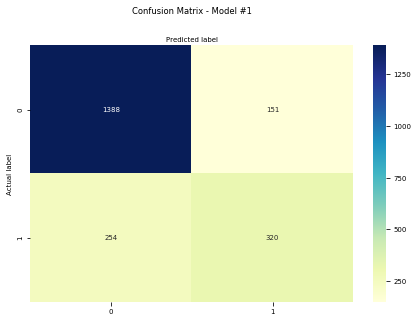

In [52]:
#Build Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y1_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Model #1', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test['Churn'], y1_pred))

Accuracy: 0.808329389493611


### Model 2

In [54]:
y=model[['Churn']]
X=model.drop(['Churn', 'gender_Male', 'InternetService_No', 'Contract_Month-to-month', 'PaymentMethod_Mailed check', 'TotalCharges', 'MonthlyCharges', 'StreamingMovies', 'Partner', 'DeviceProtection', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)','OnlineBackup', 'gender_Female', 'SeniorCitizen'], axis=1)

In [55]:
colnames = (X.columns.values)

In [56]:
X_train= X_train[colnames]
X_test = X_test[colnames]

In [57]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.424427
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4917
Method:                           MLE   Df Model:                           12
Date:                Sun, 09 Dec 2018   Pseudo R-squ.:                  0.2629
Time:                        18:01:05   Log-Likelihood:                -2092.4
converged:                       True   LL-Null:                       -2838.9
                                        LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Dependents                        -0.2290      0.094     -2.439     

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Cartney\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
y2_pred=logreg.predict(X_test)
y2_pred_train=logreg.predict(X_train)

In [60]:
# Print Train results
print("Number of mislabeled points out of a total {} points : {}, Accuracy {:05.2f}%"
      .format(
          X_train.shape[0],
          (y_train['Churn']!= y2_pred_train).sum(),
          100*(1-(y_train['Churn'] != y2_pred_train).sum()/X_train.shape[0])
))

Number of mislabeled points out of a total 4930 points : 977, Accuracy 80.18%


In [61]:
# Print Test results
print("Number of mislabeled points out of a total {} points : {}, Accuracy {:05.2f}%"
      .format(
          X_test.shape[0],
          (y_test['Churn']!= y2_pred).sum(),
          100*(1-(y_test['Churn'] != y2_pred).sum()/X_test.shape[0])
))

Number of mislabeled points out of a total 2113 points : 412, Accuracy 80.50%


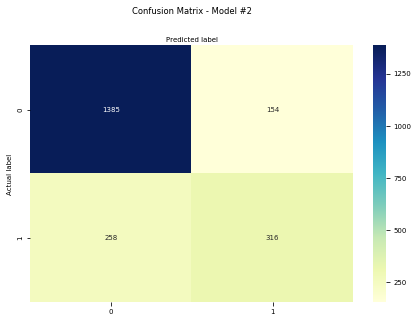

In [62]:
cnf_matrix = metrics.confusion_matrix(y_test, y2_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Model #2', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y2_pred))

Accuracy: 0.8050165641268339


## Clustering Customers

Next, we will segment our customers based upon two variables:
- Tenure
- Monthly Charges

In [244]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [245]:
#Churners
churners = df[df['Churn'] == 1]
Y = churners[['tenure','MonthlyCharges']]

In [246]:
#All customers
X = df[['tenure','MonthlyCharges']]
customers = df

### Determine Optimal K

##### Customers

In [247]:
#Determine K via kmeans - Customers
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

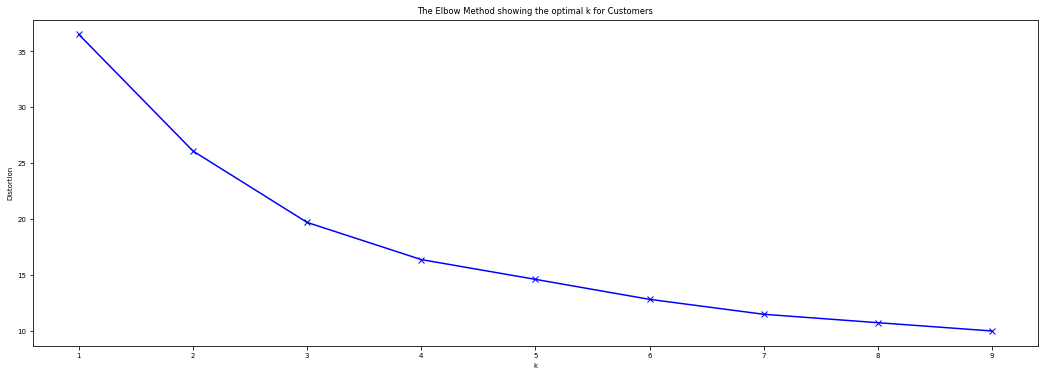

In [248]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Customers')
plt.show()

In the above plot, we are going to go with k=4. Let's cluster with that number.

In [249]:
kmeanModel = KMeans(n_clusters=4).fit(X)

In [250]:
kmeanModel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [251]:
labels = kmeanModel.labels_
centroids = kmeanModel.cluster_centers_

In [252]:
#Labels DF
labelsDF = pd.DataFrame(labels, columns=['Cluster']).reset_index()
labelsDF = labelsDF.groupby(by=['Cluster'])['index'].count()
labelsDF = pd.DataFrame(labelsDF).reset_index()
labelsDF.rename(columns={"index": "Count"}, inplace=True)

Next, we will add the labels back to our dataframe.

In [253]:
#Centroid DF
centroidsDF = pd.DataFrame(centroids, columns=['tenure', 'MonthlyCharges']).reset_index()
centroidsDF.rename(columns={"index": "Cluster"}, inplace=True)
centroidsDF = pd.merge(centroidsDF, labelsDF,how='inner', on=['Cluster'])

In [254]:
customers['Cluster'] = labels

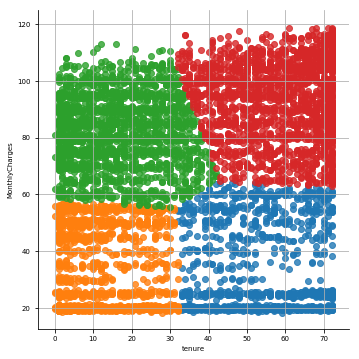

In [255]:
#Scatterplot of Clusters
sns.lmplot( x="tenure", y="MonthlyCharges", data=customers, fit_reg=False, hue='Cluster', legend=False)
plt.grid(True)
plt.show()

In [256]:
# of Customers by Cluster
customers.groupby(by=['Cluster'])['customerID'].count()

Cluster
0    1153
1    1745
2    2188
3    1957
Name: customerID, dtype: int64

In [230]:
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,2


In [231]:
customers.to_csv('customers.csv', sep=',')

##### Churners

In [234]:
#Determine K via kmeans - Churners
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Y)
    kmeanModel.fit(Y)
    distortions.append(sum(np.min(cdist(Y, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Y.shape[0])

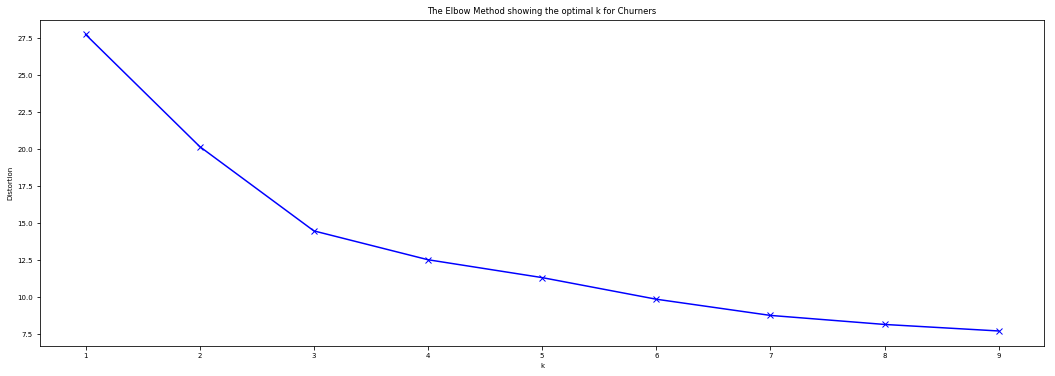

In [235]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Churners')
plt.show()

In the above plot, we are going to go with k=3. Let's cluster with that number.

In [236]:
kmeanModel = KMeans(n_clusters=3).fit(Y)

In [237]:
kmeanModel.fit(Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [238]:
labels = kmeanModel.labels_
centroids = kmeanModel.cluster_centers_

In [239]:
#Labels DF
labelsDF = pd.DataFrame(labels, columns=['Cluster']).reset_index()
labelsDF = labelsDF.groupby(by=['Cluster'])['index'].count()
labelsDF = pd.DataFrame(labelsDF).reset_index()
labelsDF.rename(columns={"index": "Count"}, inplace=True)

In [240]:
#Centroid DF
centroidsDF = pd.DataFrame(centroids, columns=['tenure', 'MonthlyCharges']).reset_index()
centroidsDF.rename(columns={"index": "Cluster"}, inplace=True)
centroidsDF = pd.merge(centroidsDF, labelsDF,how='inner', on=['Cluster'])

In [241]:
churners['Cluster'] = labels

C:\Users\Cartney\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


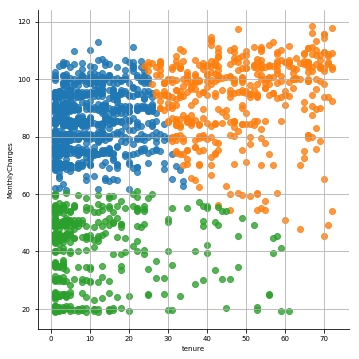

In [242]:
#Scatterplot of Clusters
sns.lmplot( x="tenure", y="MonthlyCharges", data=churners, fit_reg=False, hue='Cluster', legend=False)
plt.grid(True)
plt.show()

In [243]:
# of Churners by Cluster
churners.groupby(by=['Cluster'])['customerID'].count()

Cluster
0    949
1    438
2    482
Name: customerID, dtype: int64

In [304]:
churnerCustomers = pd.read_csv('churners.csv').set_index('Segment')

In [305]:
churnerCustomers = churnerCustomers.drop(['Tenure Index'], axis=1)

In [306]:
churnerCustomers.head()

,Monthly Charges Index,Senior Citizen Index,Partner Index,Dependents Index,Phone Service Index,Multiple Lines Index,Online Security Index,Online Backup Index,Device Protection Index,TechSupport Index,...,DSL (Internet),Fiber optic (Internet),No (Internet),Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month (Contract),One year (Contract),Two year (Contract)
Segment,,,,,,,,,,,,,,,,,,,,,
Creatures of Habit (Budget) n=55,70.313733,145.771374,112.922880,72.827230,44.288634,30.171047,101.479580,158.157117,116.317093,75.178794,...,248.598250,0.000000,67.132134,91.230570,109.376419,124.535076,63.550643,95.834369,147.788681,67.993564
Proceed with Caution n=428,58.353949,86.456782,49.337800,63.950702,75.797720,18.277854,44.827063,34.550679,35.329958,37.838236,...,219.544040,0.000000,113.226657,45.828441,50.815608,118.981348,170.476827,174.535605,17.874387,0.970832
"New Customer, Will Spend n=1074",129.170250,172.269565,66.695295,50.659227,110.515399,120.736361,40.275299,69.113973,75.541129,46.840915,...,19.231669,212.448363,0.000000,54.364585,46.102294,198.534179,50.037256,175.831729,15.581839,0.000000
Loyalty is Royalty n=312,151.485614,203.598332,126.736629,73.819267,110.721585,199.827931,111.806429,172.857618,178.949374,115.960880,...,16.783433,214.362825,0.000000,111.114156,96.405497,153.673091,14.003547,102.528371,150.184953,50.607745


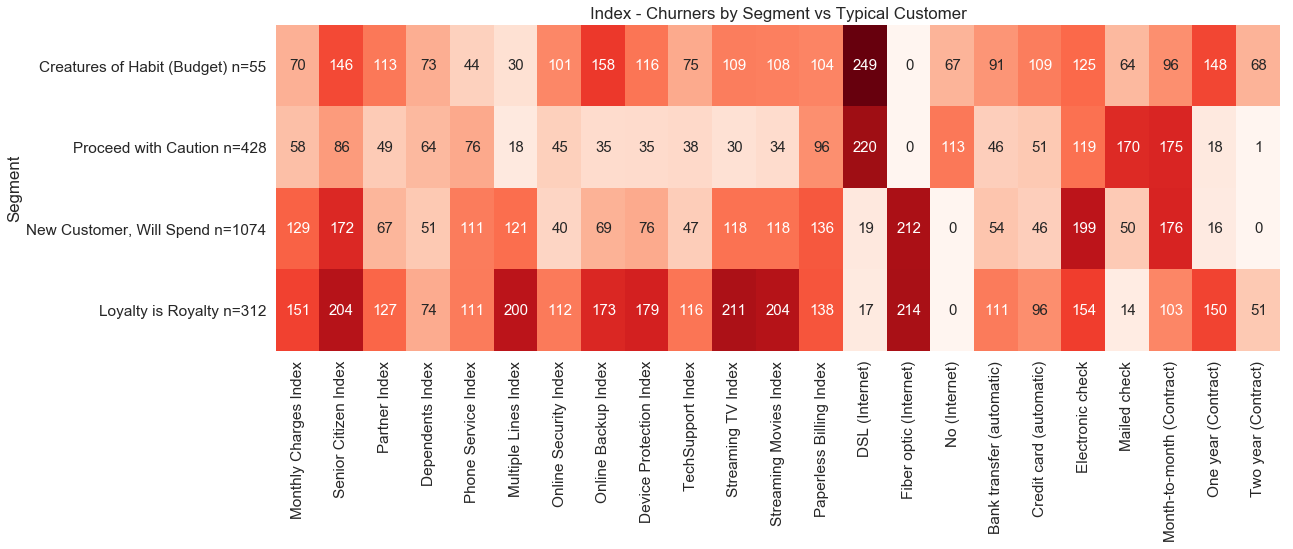

In [307]:
sns.set(font_scale=1.4)
sns.heatmap(churnerCustomers, annot=True, fmt='.0f', cmap='Reds', cbar=False, annot_kws={"size": 15})
plt.title('Index - Churners by Segment vs Typical Customer')
plt.ylabel('Segment')
plt.show()